#네이버 뉴스 크롤링 형태소 분석_전자담배

In [ ]:
!pip install konlpy
!pip install matplotlib
!pip install koreanize_matplotlib
!pip install wordcloud
# 한글 폰트 설치
!apt-get update
!apt-get install fonts-nanum* -y

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 71.4 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
import re
import os
os.listdir()

['배달의민족댓글.csv',
 '원티드 포텐업_KoNLPy.ipynb',
 '배달의민족 데이터 분석.ipynb의 사본',
 '원티드랩_KoNLPy.ipynb의 사본',
 '서울특별시 공공자전거 이용정보(월별)_24.1-6.csv의 사본',
 'ftour_new.csv의 사본',
 '배달의민족댓글.csv의 사본',
 'mpg.csv의 사본',
 'customer_example.csv의 사본',
 '공공자전거 대여소 정보.csv의 사본',
 'cdata.csv의 사본',
 'ftour.csv의 사본',
 'cdata_nohead.csv의 사본',
 '배달의민족 장바구니분석.ipynb의 사본',
 '241205 HOC 파이썬 실험실.ipynb',
 '수업실습)배달의 민족 장바구니분석.ipynb',
 '수업실습)인덱싱과 임베딩.ipynb',
 '배달의민족댓글2.csv',
 '프로그래머스 연습.ipynb',
 '과제-배민 빈도수 분석.ipynb의 사본',
 '네이버_인공지능_뉴스_검색_내역_241217.csv',
 '네이버_뉴스_인공지능_검색_결과.csv',
 'Naver OPEN API.ipynb',
 '서울열린데이터Open API_241217.ipynb',
 'Beautifulsoup.ipynb',
 '네이버_쇼핑_흡연_키워드_검색_결과.gsheet',
 '네이버_쇼핑_흡연_키워드_

In [ ]:
#파일을 불러오자 먼저
data = pd.read_csv('네이버뉴스크롤링_전자담배.csv').dropna()
data

,year,name,link,title
0,2022,연합뉴스언론사 선정,https://n.news.naver.com/mnews/article/001/001...,담뱃갑 경고그림 내일 교체…꽁초 든 젖병·담배연기가 된 얼굴
1,2022,헤럴드POP,https://m.entertain.naver.com/article/112/0003...,"이상준 ""탁재훈, 여학생에 5만원 지폐 다 꺼내 주며 전자담배 사 피우라..."
2,2022,파이낸셜뉴스언론사 선정,https://n.news.naver.com/mnews/article/014/000...,"'담배꽁초 젖병' 문 아기, 검게 타버린 생식기..담뱃갑 경고 더 끔찍해..."
3,2022,이코노미스트언론사 선정,https://n.news.naver.com/mnews/article/243/000...,"“뉴질랜드 금연 법안 살펴라”…전자담배협회, 목소리 낸 까닭"
4,2022,매일경제언론사 선정,https://n.news.naver.com/mnews/article/009/000...,"""가게서 안사요""… 온라인서 담배사는 청소년"
...,...,...,...,...
1837,2024,오마이뉴스,https://n.news.naver.com/mnews/article/047/000...,'전혀 괜찮지 않은 담배'는 무엇? 답은 금연광고에...
1838,2024,경향신문,https://n.news.naver.com/mnews/article/032/000...,이래도 피우시겠습니까··· 담뱃갑 포장에 ‘폐암으로 가는 길’ ‘남...
1839,2024,뉴시스,https://n.news.naver.com/mnews/article/003/001...,"KT&G, '릴 에이블' 전용 베이퍼 스틱 탱고·트로피 2종 출시"
1840,2024,머니투데이,https://n.news.naver.com/mnews/article/008/000...,"""비즈니스는 손해보고 파는 것""...담배기기 편의점 수수료 인상 요구한..."


##형태소 분석을 해보자_전체

In [ ]:
okt = Okt()

In [ ]:
# 제목 열에서 명사 추출
titles = data["title"]  # title 열 선택
all_nouns = []  # 명사를 담을 리스트
stopwords = []  #일단, 없이 진행해 보자

for title in titles:
    nouns = okt.nouns(title)  # 제목에서 명사 추출
    all_nouns.extend(nouns)  # 추출된 명사를 리스트에 추가

print("추출된 명사 수:", len(all_nouns))
print("추출된 명사:", (all_nouns))

추출된 명사 수: 14327
추출된 명사: ['담뱃갑', '경고', '그림', '내일', '교체', '꽁초', '젖병', '담배', '연기', '얼굴', '이상준', '탁재훈', '여학생', '지폐', '전자담배', '사', '담배', '꽁초', '젖병', '문', '아기', '타', '생식기', '담뱃갑', '경고', '더', '뉴질랜드', '금연', '법안', '전자담배', '협회', '목소리', '까닭', '가게', '온라인', '담배', '청소년', '영아', '입', '담배', '젖병', '담뱃갑', '그림', '내일', '부터', '더', '뉴질랜드', '담배', '못', '산다', '어기', '벌금', '뉴질랜드', '청소년', '담배', '구입', '영구', '금지', '법', '채택', '전자담배', '기기', '신제품', '경쟁', '글', '하이퍼', '출시', '내년', '미성년', '담배', '대리', '구매', '판매', '자도', '미성년', '여', '순간', '퐁', '전자담배', '열풍', '고급', '라이터', '하카', '코리아', '하카', '처', '전자담배', '전용', '액', '비비드', '그린', '출시', '예정', '궐련', '전자담배', '릴', '에이', '블', '전국', '판매', '처', '확대', '돈', '버', '효자', '담배', '긴축', '한파', '최대', '실적', '포', '지구촌', '돋보기', '담배', '평생', '금지', '뉴질랜드', '금연', '실험', '뉴질랜드', '초', '강력', '금연', '법', '살', '이하', '평생', '담배', '일본', '방위', '비', '증액', '재원', '법인', '담배', '부흥', '세', '활용', '추진', '전자담배', '위', '필립모리스', '박빙', '담배', '연기', '미래', '한국', '필립모리스', '포터', '연속', '수', '전자담배', '치아', '안', '연구', '전자담배', '곳', '도', '전

In [ ]:
#빈도 계산하기
from collections import Counter

# 명사 빈도 계산
noun_counts = Counter(all_nouns)
print(noun_counts)

# 가장 많이 등장한 단어 상위 50개
noun_counts50 = noun_counts.most_common(50)
print(noun_counts50)

Counter({'전자담배': 1083, '담배': 619, '흡연': 217, '액': 194, '궐련': 130, '출시': 110, '규제': 103, '금지': 102, '더': 101, '니코틴': 99, '합성': 96, '담뱃갑': 94, '명': 94, '그림': 93, '판매': 89, '위': 88, '시장': 87, '상형': 86, '체납': 84, '금연': 83, '못': 73, '릴': 72, '경고': 71, '공개': 71, '청소년': 63, '유해': 62, '법': 61, '필립모리스': 58, '길': 55, '안': 54, '아이': 50, '건강': 49, '마약': 49, '율': 49, '세금': 48, '문구': 48, '단독': 48, '폐암': 47, '내년': 46, '한국': 44, '꽁초': 42, '성분': 42, '에이': 41, '블': 41, '비': 41, '이': 41, '고액': 40, '국내': 40, '코스': 38, '등': 37, '연초': 37, '연기': 36, '종합': 36, '생산': 35, '통과': 35, '로': 34, '상습': 34, '사업': 34, '신제품': 33, '추진': 33, '사용': 33, '경쟁': 32, '명단': 32, '아기': 31, '대마': 31, '뷰': 31, '젖병': 30, '것': 30, '새': 30, '영국': 30, '평생': 29, '수능': 29, '스': 29, '제시': 29, '술': 28, '일회용': 28, '성인': 28, '코리아': 27, '확대': 27, '관세': 27, '로스': 27, '실내': 27, '중': 26, '종': 26, '업자': 26, '적용': 26, '정부': 26, '베트남': 26, '세': 25, '줄': 25, '지대': 25, '내': 24, '영상': 24, '사각': 24, '배': 23, '물질': 23, '전자': 23, '적발': 23, '매출': 23, '알': 

##워드클라우드 생성

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import koreanize_matplotlib

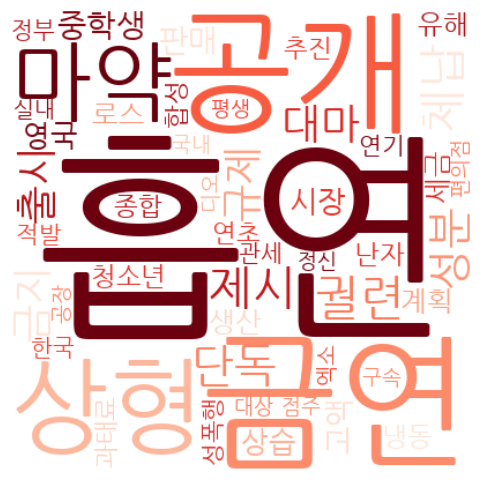

In [ ]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    width=400,            # 워드 클라우드 이미지 가로 크기
    height=400,           # 워드 클라우드 이미지 세로 크기
    background_color='white',  # 배경색 (기본값: black)
    font_path = "/usr/sharae/fonts/trutype/nanum/NanumGothic.ttf",
    colormap='Reds',
).generate_from_frequencies(dict(noun_counts50))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

##불용어 처리


In [ ]:
# 제목 열에서 명사 추출
titles = data["title"]  # title 열 선택
nouns_list = []  # 명사를 담을 리스트
stopwords = ["담배", "전자담배"]

for title in titles:
  nouns = okt.nouns(title)  # 제목에서 명사 추출
  filtered_nouns = [noun for noun in nouns if len(noun) > 1 and noun not in stopwords]  # 불용어와 1글자 단어 제거
  nouns_list.extend(filtered_nouns)  # 필터링된 명사를 리스트에 추가

print("추출된 명사 수:", len(nouns_list))
print("추출된 명사:", (nouns_list))

추출된 명사 수: 10098
추출된 명사: ['담뱃갑', '경고', '그림', '내일', '교체', '꽁초', '젖병', '연기', '얼굴', '이상준', '탁재훈', '여학생', '지폐', '꽁초', '젖병', '아기', '생식기', '담뱃갑', '경고', '뉴질랜드', '금연', '법안', '협회', '목소리', '까닭', '가게', '온라인', '청소년', '영아', '젖병', '담뱃갑', '그림', '내일', '부터', '뉴질랜드', '산다', '어기', '벌금', '뉴질랜드', '청소년', '구입', '영구', '금지', '채택', '기기', '신제품', '경쟁', '하이퍼', '출시', '내년', '미성년', '대리', '구매', '판매', '자도', '미성년', '순간', '열풍', '고급', '라이터', '하카', '코리아', '하카', '전용', '비비드', '그린', '출시', '예정', '궐련', '에이', '전국', '판매', '확대', '효자', '긴축', '한파', '최대', '실적', '지구촌', '돋보기', '평생', '금지', '뉴질랜드', '금연', '실험', '뉴질랜드', '강력', '금연', '이하', '평생', '일본', '방위', '증액', '재원', '법인', '부흥', '활용', '추진', '필립모리스', '박빙', '연기', '미래', '한국', '필립모리스', '포터', '연속', '치아', '연구', '청소년', '중독', '미국', '소송', '합의', '종결', '미국', '브랜드', '경기', '침체', '도박', '죄악', '궐련', '시장', '지배', '목표', '하이', '연기', '미래', '전략', '사회', '기여', '상형', '세금', '종량세', '종가세', '전환', '대감', '자숙', '파티', '김새론', '소속사', '손절', '이슈', '에어', '흡연', '여부', '탐지', '에어', '유럽연합', '소비', '인상', '추진', '세금', '아이', '코스', '제로', '

In [ ]:
#빈도 계산하기
from collections import Counter

# 명사 빈도 계산
fnoun_counts = Counter(nouns_list)
print(nouns_list)

# 가장 많이 등장한 단어 상위 50개
fnoun_counts50 = fnoun_counts.most_common(50)
print(fnoun_counts50)

['담뱃갑', '경고', '그림', '내일', '교체', '꽁초', '젖병', '연기', '얼굴', '이상준', '탁재훈', '여학생', '지폐', '꽁초', '젖병', '아기', '생식기', '담뱃갑', '경고', '뉴질랜드', '금연', '법안', '협회', '목소리', '까닭', '가게', '온라인', '청소년', '영아', '젖병', '담뱃갑', '그림', '내일', '부터', '뉴질랜드', '산다', '어기', '벌금', '뉴질랜드', '청소년', '구입', '영구', '금지', '채택', '기기', '신제품', '경쟁', '하이퍼', '출시', '내년', '미성년', '대리', '구매', '판매', '자도', '미성년', '순간', '열풍', '고급', '라이터', '하카', '코리아', '하카', '전용', '비비드', '그린', '출시', '예정', '궐련', '에이', '전국', '판매', '확대', '효자', '긴축', '한파', '최대', '실적', '지구촌', '돋보기', '평생', '금지', '뉴질랜드', '금연', '실험', '뉴질랜드', '강력', '금연', '이하', '평생', '일본', '방위', '증액', '재원', '법인', '부흥', '활용', '추진', '필립모리스', '박빙', '연기', '미래', '한국', '필립모리스', '포터', '연속', '치아', '연구', '청소년', '중독', '미국', '소송', '합의', '종결', '미국', '브랜드', '경기', '침체', '도박', '죄악', '궐련', '시장', '지배', '목표', '하이', '연기', '미래', '전략', '사회', '기여', '상형', '세금', '종량세', '종가세', '전환', '대감', '자숙', '파티', '김새론', '소속사', '손절', '이슈', '에어', '흡연', '여부', '탐지', '에어', '유럽연합', '소비', '인상', '추진', '세금', '아이', '코스', '제로', '스모크', '일반', '유해', '물질', 

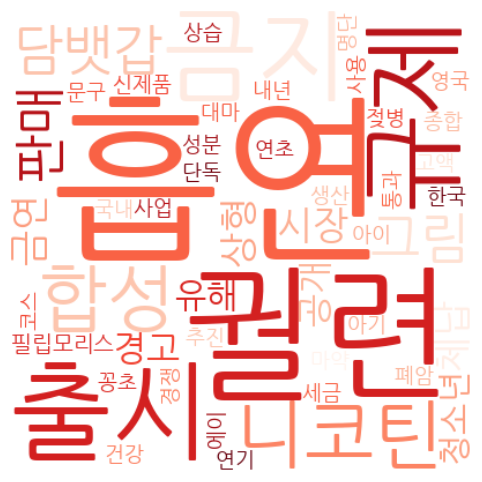

In [ ]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    width=400,            # 워드 클라우드 이미지 가로 크기
    height=400,           # 워드 클라우드 이미지 세로 크기
    background_color='white',  # 배경색 (기본값: black)
    font_path = "/usr/sharae/fonts/trutype/nanum/NanumGothic.ttf",
    colormap='Reds',
).generate_from_frequencies(dict(fnoun_counts50))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

In [ ]:
# 예제 데이터 (뉴스 제목)
titles = data['title']  # 뉴스 제목 열

# 동사를 담을 리스트
all_verbs = []

# 불용어 리스트
#stopwords = []  # 불용어를 추가하세요

# 제목에서 동사 추출
for title in titles:
    tokens = okt.pos(title)  # 형태소 분석과 품사 태깅
    verbs = [word for word, pos in tokens if pos == 'Verb']  # 품사가 'Verb'인 단어만 추출 & dkd
    all_verbs.extend(verbs)

# 불용어 제거
#filtered_verbs = [verb for verb in all_verbs if verb not in stopwords]

print("추출된 동사 수:", len(all_verbs))
print("동사 리스트:", all_verbs)

추출된 동사 수: 1683
동사 리스트: ['든', '된', '꺼내', '주며', '피우라', '버린', '살펴라', '낸', '사요', '사는', '노린', '이긴', '는', '뚫고', '끌어', '냈다', '사', '놓고', '꿈꾼다', '썩게', '만든다', '뜬다', '커질', '낮아지나', '쏘', '물린다', '줄어', '굳힌다', '때리려는', '넘어선']


In [ ]:
# # 상위 30개 동사 추출
# top_verbs = verb_counts.most_common(30)
# top_verbs
# #한글자가 너무 많이 나옴

In [ ]:
#한글자 이상 동사만 추출하기

# 동사를 담을 리스트
all_verbs2 = []

# 제목에서 동사 추출
for title in titles:
    tokens = okt.pos(title)  # 형태소 분석과 품사 태깅
    verbs2 = [word for word, pos in tokens if pos == 'Verb' and len(word) > 1]  # 품사가 'Verb'인 단어만 추출 & 한 단어 는 뺸다.
    all_verbs2.extend(verbs2)


print("추출된 동사 수:", len(all_verbs2))
print("동사 리스트:", all_verbs2)

추출된 동사 수: 1415
동사 리스트: ['꺼내', '주며', '피우라', '버린', '살펴라', '사요', '사는', '노린', '이긴', '뚫고', '끌어', '냈다', '놓고', '꿈꾼다', '썩게', '만든다', '뜬다', '커질', '낮아지나', '물린다', '줄어', '굳힌다', '때리려는', '넘어선', '바꾼', '늘었다', '되면', '놓친', '타오르는', '늦어지는', '쏟아진다', '붙은', '밝힌', '썩게', '만든다', '뜬다', '커질', '낮아지나', '물린다', '줄어', '굳힌다', '사로잡은', '줄어', '굳힌다', '때리려는', '넘어선', '세진다', '바뀌나', '봤더니', '바뀐다', '바꾼', '늘었다', '하는', '하는', '되면', '놓친', '타오르는', '놓친', '타오르는', '늦어지는', '쏟아진다', '붙은', '밝힌', '바뀐', '냈다', '막는다', '바뀐', '냈다', '냈다', '됐다', '빠져', '됐다', '빠져', '된다', '됐다', '빠져', '된다', '보니', '빠져', '된다', '붙은', '빠져', '주는', '크는', '된다', '붙은', '굳히', '빠져', '주는', '크는', '된다', '주는', '크는', '된다', '내놔', '굳힐까', '붙은', '다뤄야', '붙는다', '붙는다', '품은', '알려줘', '알려줘', '붙은', '알려줘', '붙은', '붙은', '붙은', '붙은', '이어', '두고', '내린', '보니', '놓고', '되찾는다', '시달리던', '찾아', '되면', '돼요', '붙는', '되찾는다', '시달리던', '찾아', '되면', '돼요', '팝니다', '시달리던', '찾아', '되면', '돼요', '팝니다', '돌아온', '되면', '돼요', '팝니다', '타는', '이뤄져야', '되면', '돼요', '팝니다', '타는', '타는', '피던', '줄었지만', '늘었다', '하며', '들켰다', '차린', '들켰다', '차린', '없앴다

In [ ]:
# 명사 빈도 계산
verb_counts2 = Counter(all_verbs2)
print(verb_counts2)

Counter({'가는': 49, '하는': 30, '피우는': 21, '보니': 20, '피운': 16, '피는': 15, '해야': 15, '끊었다': 15, '된다': 14, '훔친': 14, '늘었다': 13, '낳고': 12, '싶어': 12, '메디': 12, '봤더니': 11, '바뀐다': 11, '피운다': 11, '붙은': 10, '늘어': 10, '들고': 10, '됐다': 9, '돼요': 9, '할까': 9, '노린': 8, '세진다': 8, '뚫린': 8, '했다': 8, '한다': 8, '훔쳐': 8, '나왔다': 8, '사게': 8, '피우면': 8, '재도전': 8, '사는': 7, '되면': 7, '혼난다': 7, '속여': 7, '잃게': 7, '하세요': 7, '냈다': 6, '물린다': 6, '줄어': 6, '빠져': 6, '올렸다': 6, '피울': 6, '하려': 6, '피운다고': 6, '되는': 6, '밝혀': 6, '타오른다': 6, '쏟았다': 6, '하는데': 6, '넣은': 6, '맡아도': 6, '시킨': 6, '파는': 6, '피워': 6, '아냐': 6, '돼도': 6, '몰라': 6, '했는데': 6, '피우시겠습니까': 6, '병들게': 6, '피울래요': 6, '받나': 6, '이어': 5, '타는': 5, '빠진': 5, '잃은': 5, '피울래': 5, '노렸나': 5, '노담': 5, '쏟았어요': 5, '섞어': 5, '재워': 5, '줬더니': 5, '준다': 5, '그려': 5, '넣는다': 5, '놓고': 4, '굳힌다': 4, '두고': 4, '찾아': 4, '팝니다': 4, '없앴다': 4, '잇따라': 4, '둬야': 4, '피울건': 4, '달아난': 4, '돌린': 4, '맞나': 4, '끊어': 4, '높이려면': 4, '알았는데': 4, '늘어난': 4, '넘어': 4, '신던': 4, '도와주는': 4, '찌든': 4, '늘린': 4, '봐도': 4, '사라질까': 4, '느

In [ ]:
# 가장 많이 등장한 단어 상위 30개 확인
verb_top30 = verb_counts2.most_common(50)
print(verb_top30)


[('가는', 49), ('하는', 30), ('피우는', 21), ('보니', 20), ('피운', 16), ('피는', 15), ('해야', 15), ('끊었다', 15), ('된다', 14), ('훔친', 14), ('늘었다', 13), ('낳고', 12), ('싶어', 12), ('메디', 12), ('봤더니', 11), ('바뀐다', 11), ('피운다', 11), ('붙은', 10), ('늘어', 10), ('들고', 10), ('됐다', 9), ('돼요', 9), ('할까', 9), ('노린', 8), ('세진다', 8), ('뚫린', 8), ('했다', 8), ('한다', 8), ('훔쳐', 8), ('나왔다', 8), ('사게', 8), ('피우면', 8), ('재도전', 8), ('사는', 7), ('되면', 7), ('혼난다', 7), ('속여', 7), ('잃게', 7), ('하세요', 7), ('냈다', 6), ('물린다', 6), ('줄어', 6), ('빠져', 6), ('올렸다', 6), ('피울', 6), ('하려', 6), ('피운다고', 6), ('되는', 6), ('밝혀', 6), ('타오른다', 6)]


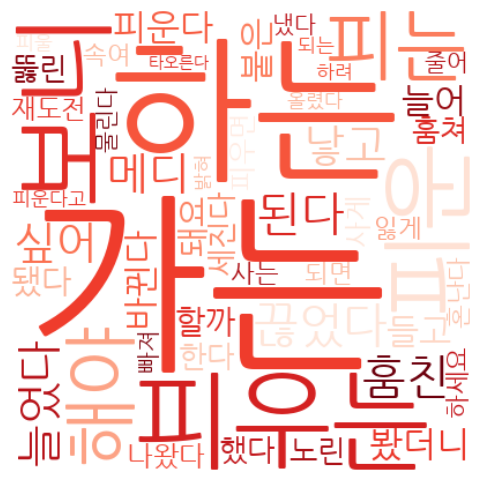

In [ ]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    width=400,            # 워드 클라우드 이미지 가로 크기
    height=400,           # 워드 클라우드 이미지 세로 크기
    background_color='white',  # 배경색 (기본값: black)
    font_path = "/usr/sharae/fonts/trutype/nanum/NanumGothic.ttf",
    colormap='Reds',
).generate_from_frequencies(dict(verb_top30))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

In [ ]:
# 예제 데이터 (뉴스 제목)
titles = data['title']  # 뉴스 제목 열

# 동사를 담을 리스트
all_adj = []

# 불용어 리스트
#stopwords = []  # 불용어를 추가하세요

# 제목에서 동사 추출
for title in titles:
    tokens = okt.pos(title)  # 형태소 분석과 품사 태깅
    adjs = [word for word, pos in tokens if pos == "Adjective"]  # 품사가 형용사
    all_adj.extend(adjs)

# 불용어 제거
#filtered_verbs = [verb for verb in all_verbs if verb not in stopwords]

print("추출된 형용사 수:", len(all_adj))
print("형용사 :", all_adj)

추출된 형용사 수: 376
형용사 : ['검게', '끔찍해', '강력해진다', '영원히', '치열한데', '성공할까', '없는', '좋을까', '없는', '가능한', '있다', '있으면', '없는', '가능한', '끔찍해진다', '어떻게', '높은', '독해진', '있는', '강렬해지는', '있는', '강렬해지는', '있다', '있다', '있으면', '가득한', '강력해졌다', '가득한', '강력해졌다', '해롭다', '해롭다', '해롭다', '강렬해진다', '강렬해진다', '강렬해진다', '없는', '없는', '심했다', '심했다', '독특한', '없어', '없어', '없어', '없는', '어떻게', '없는', '어떻게', '나쁘다면서', '좋다는', '나쁘다면서', '좋다는', '높다', '불편함', '불편함', '불편함', '불편함', '해롭다', '해롭다', '해롭다', '해롭다', '낮아', '없는', '낮아', '낮아', '해롭다', '급히', '좋다고', '급히', '급히', '있는', '있는', '머니', '머니', '무서운', '같다니', '무서운', '같다니', '없는', '힘든', '강력해지는', '강력해지는', '가능한', '가능한', '강하게', '독해진다', '독해진다', '있다', '독해진', '무서운', '같다고', '있는', '무서운', '같다고', '시급해', '급히', '급히', '끔찍해진다', '완전히', '강해질', '무섭게', '독해진다', '높다', '독해진다', '높다', '없는', '미', '없는', '다를까', '없는', '필요한데', '급히', '없는', '새로운', '없는', '새로운', '없는', '없을까', '많길래', '없는', '없는', '뜨거워지는', '무서운', '같다니', '미', '많고', '무서운', '같다니', '미', '괜찮다고', '많은', '무서운', '같다니', '미', '무서운', '같다니', '미', '미', '미', '미', '더러워', '더러워', '수상해', '회복한', '수상

In [ ]:
# 명사 빈도 계산
adj_counts = Counter(all_adj)
print(adj_counts)

Counter({'없는': 27, '해롭다': 12, '아니다': 12, '없어': 11, '미': 11, '강력해지는': 10, '있다': 8, '무서운': 8, '젊은': 8, '어떻게': 7, '독해진다': 7, '새로운': 7, '급히': 6, '같다니': 6, '아닌': 6, '없다': 6, '많아': 6, '있는': 5, '많은': 5, '가능한': 4, '불편함': 4, '이런': 4, '성실히': 4, '화하며': 4, '있을까': 4, '순하다': 4, '괜찮지': 4, '흰': 4, '성공할까': 3, '높은': 3, '독해진': 3, '강렬해진다': 3, '높다': 3, '낮아': 3, '머니': 3, '비싸': 3, '어려워': 3, '해로운': 3, '안된다': 3, '해로울까': 3, '순한': 3, '해롭': 3, '안이한': 3, '살벌해졌다': 3, '적법한': 3, '높았다': 3, '영원히': 2, '있으면': 2, '끔찍해진다': 2, '강렬해지는': 2, '가득한': 2, '강력해졌다': 2, '심했다': 2, '나쁘다면서': 2, '좋다는': 2, '같다고': 2, '완전히': 2, '더러워': 2, '수상해': 2, '있었을지도': 2, '나쁜': 2, '괜찮다': 2, '쎈': 2, '어떤': 2, '당했길래': 2, '올바른': 2, '원하냐': 2, '있어': 2, '미친': 2, '너무하다': 2, '손쉽게': 2, '아니라고': 2, '입니다': 2, '중요한': 2, '괜찮을까': 2, '강화한': 2, '검은': 2, '빠른': 2, '못지않게': 2, '나빠': 2, '아니었어': 2, '아쉬워': 2, '검게': 1, '끔찍해': 1, '강력해진다': 1, '치열한데': 1, '좋을까': 1, '독특한': 1, '좋다고': 1, '힘든': 1, '강하게': 1, '시급해': 1, '강해질': 1, '무섭게': 1, '다를까': 1, '필요한데': 1, '없을까': 1, '많길래': 1, '뜨거워지는': 

In [ ]:
# 가장 많이 등장한 단어 상위 30개 확인
adj_top30 = adj_counts.most_common(50)
print(adj_top30)

[('없는', 27), ('해롭다', 12), ('아니다', 12), ('없어', 11), ('미', 11), ('강력해지는', 10), ('있다', 8), ('무서운', 8), ('젊은', 8), ('어떻게', 7), ('독해진다', 7), ('새로운', 7), ('급히', 6), ('같다니', 6), ('아닌', 6), ('없다', 6), ('많아', 6), ('있는', 5), ('많은', 5), ('가능한', 4), ('불편함', 4), ('이런', 4), ('성실히', 4), ('화하며', 4), ('있을까', 4), ('순하다', 4), ('괜찮지', 4), ('흰', 4), ('성공할까', 3), ('높은', 3), ('독해진', 3), ('강렬해진다', 3), ('높다', 3), ('낮아', 3), ('머니', 3), ('비싸', 3), ('어려워', 3), ('해로운', 3), ('안된다', 3), ('해로울까', 3), ('순한', 3), ('해롭', 3), ('안이한', 3), ('살벌해졌다', 3), ('적법한', 3), ('높았다', 3), ('영원히', 2), ('있으면', 2), ('끔찍해진다', 2), ('강렬해지는', 2)]


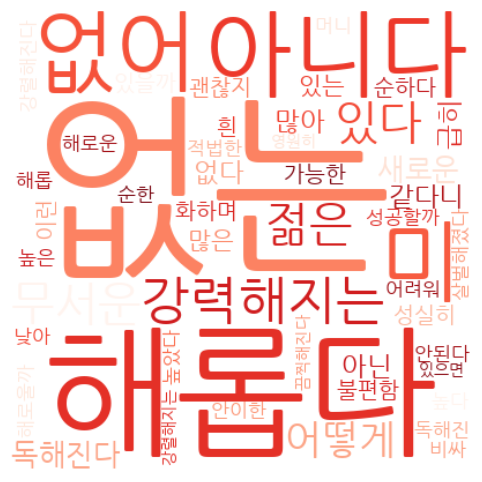

In [ ]:
# 워드 클라우드 생성
wordcloud = WordCloud(
    width=400,            # 워드 클라우드 이미지 가로 크기
    height=400,           # 워드 클라우드 이미지 세로 크기
    background_color='white',  # 배경색 (기본값: black)
    font_path = "/usr/sharae/fonts/trutype/nanum/NanumGothic.ttf",
    colormap='Reds',
).generate_from_frequencies(dict(adj_top30))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

##특정 년도 명사 워드 클라우드

추출된 명사 수: 3040
추출된 명사: ['담뱃갑', '경고', '그림', '내일', '교체', '꽁초', '젖병', '연기', '얼굴', '이상준', '탁재훈', '여학생', '지폐', '꽁초', '젖병', '아기', '생식기', '담뱃갑', '경고', '뉴질랜드', '금연', '법안', '협회', '목소리', '까닭', '가게', '온라인', '청소년', '영아', '젖병', '담뱃갑', '그림', '내일', '부터', '뉴질랜드', '산다', '어기', '벌금', '뉴질랜드', '청소년', '구입', '영구', '금지', '채택', '기기', '신제품', '경쟁', '하이퍼', '출시', '내년', '미성년', '대리', '구매', '판매', '자도', '미성년', '순간', '열풍', '고급', '라이터', '하카', '코리아', '하카', '전용', '비비드', '그린', '출시', '예정', '궐련', '에이', '전국', '판매', '확대', '효자', '긴축', '한파', '최대', '실적', '지구촌', '돋보기', '평생', '금지', '뉴질랜드', '금연', '실험', '뉴질랜드', '강력', '금연', '이하', '평생', '일본', '방위', '증액', '재원', '법인', '부흥', '활용', '추진', '필립모리스', '박빙', '연기', '미래', '한국', '필립모리스', '포터', '연속', '치아', '연구', '청소년', '중독', '미국', '소송', '합의', '종결', '미국', '브랜드', '경기', '침체', '도박', '죄악', '궐련', '시장', '지배', '목표', '하이', '연기', '미래', '전략', '사회', '기여', '상형', '세금', '종량세', '종가세', '전환', '대감', '자숙', '파티', '김새론', '소속사', '손절', '이슈', '에어', '흡연', '여부', '탐지', '에어', '유럽연합', '소비', '인상', '추진', '세금', '아이', '코스', '제로', '스

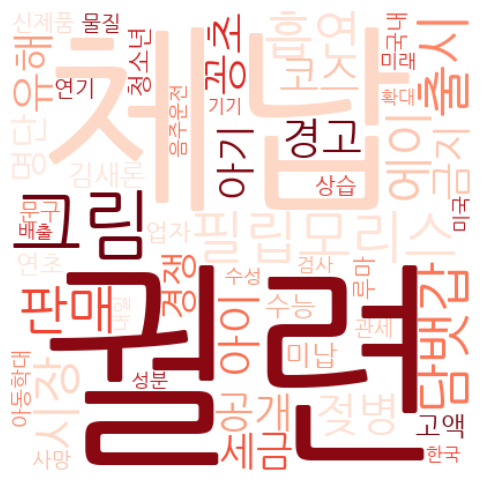

In [ ]:
# 특정 연도 데이터 필터링
year = 2022
filtered_data = data[data["year"] == year]  # year가 2022인 데이터만 선택

# 불용어 리스트 정의
stopwords = ["전자담배", "담배"]  # 예시 불용어

# 제목 열에서 명사 추출
titles = filtered_data["title"]  # title 열 선택
all_nouns = []  # 명사를 담을 리스트

for title in titles:
    nouns = okt.nouns(title)  # 제목에서 명사 추출
    # 불용어 제외
    filtered_nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]
    all_nouns.extend(filtered_nouns)  # 추출된 명사를 리스트에 추가

print("추출된 명사 수:", len(all_nouns))
print("추출된 명사:", all_nouns)

# 빈도 계산하기
from collections import Counter

# 명사 빈도 계산
noun_counts = Counter(all_nouns)
print(noun_counts)

# 가장 많이 등장한 단어 상위 50개
noun_counts50 = noun_counts.most_common(50)
print(noun_counts50)

# 워드 클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=400,            # 워드 클라우드 이미지 가로 크기
    height=400,           # 워드 클라우드 이미지 세로 크기
    background_color='white',  # 배경색 (기본값: black)
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    colormap='Reds',
    stopwords=stopwords   # WordCloud 내에서도 불용어 지정 가능
).generate_from_frequencies(dict(noun_counts50))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()


추출된 명사 수: 3546
추출된 명사: ['아이', '코스', '루마', '전용', '스틱', '테리', '센티', '상륙', '합성', '홍보', '천연', '업체', '입건', '합성', '대마', '고교생', '제공', '실형', '유튜브', '표현', '자제', '비밀', '유튜버', '열차', '뻑뻑', '실시간', '송출', '합성', '탈세', '코로나', '음주', '가장', '한국', '필립모리스', '사용', '기기', '수거', '폐기', '캠페인', '확대', '방위', '위해', '증세', '검토', '감세', '소득', '제한', '추진', '코로나', '하카', '하카', '프로모션', '진행', '한국인', '건강', '증세', '논의', '내년', '이후', '연기', '국내', '업계', '안도', '하카', '코리아', '완성형', '일회용', '하카', '출시', '둔갑', '화학', '구조', '변형', '마약', '세관', '차단', '총력', '흡연', '금연', '구역', '뻑뻑', '흡연', '식당', '수두', '정부', '발칵', '박동', '교실', '뻑뻑', '학부모', '흡연', '남자', '여자', '합성', '대마', '첨가', '징역형', '파전', '시장', '가세', '경쟁', '프랑스', '하원', '금지', '상원', '전쟁', '프랑스', '연가', '총리', '예외', '특파원', '리포트', '미성년', '대마', '제공', '성범죄', '마약', '사범', '사피', '대한민국', '광고', '대상', '수상', '김은지', '로스', '대표', '상형', '시장', '단독', '교실', '초등', '교사', '학교', '주의', '처분', '초등', '교사', '교실', '학교', '주의', '처분', '호주', '내년', '상용', '수입', '전면', '금지', '흡연', '자도', '배려', '연기', '스마트', '흡연', '부스', '호주', '멜버른', '상형', '매장',

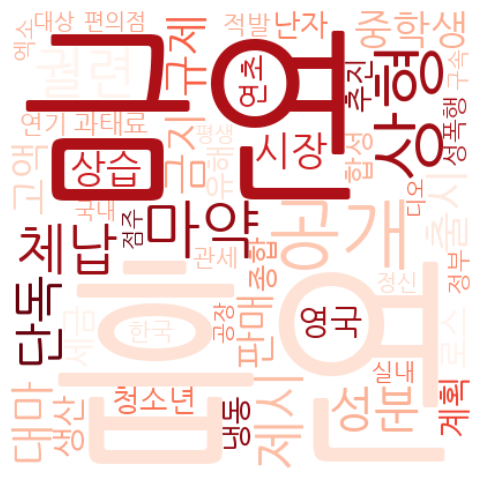

In [ ]:
# 특정 연도 데이터 필터링
year = 2023
filtered_data = data[data["year"] == year]  # year가 2022인 데이터만 선택

# 불용어 리스트 정의
stopwords = ["전자담배", "담배"]  # 예시 불용어

# 제목 열에서 명사 추출
titles = filtered_data["title"]  # title 열 선택
all_nouns = []  # 명사를 담을 리스트

for title in titles:
    nouns = okt.nouns(title)  # 제목에서 명사 추출
    # 불용어 제외
    filtered_nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]
    all_nouns.extend(filtered_nouns)  # 추출된 명사를 리스트에 추가

print("추출된 명사 수:", len(all_nouns))
print("추출된 명사:", all_nouns)

# 빈도 계산하기
from collections import Counter

# 명사 빈도 계산
noun_counts = Counter(all_nouns)
print(noun_counts)

# 가장 많이 등장한 단어 상위 50개
noun_counts50 = noun_counts.most_common(50)
print(noun_counts50)

# 워드 클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=400,            # 워드 클라우드 이미지 가로 크기
    height=400,           # 워드 클라우드 이미지 세로 크기
    background_color='white',  # 배경색 (기본값: black)
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    colormap='Reds',
    stopwords=stopwords   # WordCloud 내에서도 불용어 지정 가능
).generate_from_frequencies(dict(noun_counts50))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()


추출된 명사 수: 3512
추출된 명사: ['대도', '김장', '합성', '니코틴', '규제', '상형', '담뱃세', '부과', '업계', '찬반', '상형', '규제', '논의', '국회', '공청회', '상생', '필립모리스', '편의점', '마진', '실명', '오늘', '담뱃갑', '그림', '여성', '사용', '우울', '경험', '금연', '건강', '일반', '독해', '경고', '그림', '사용', '위험', '음주', '최저', '세종시', '최고', '어디', '사진', '우웩', '세진', '담뱃갑', '경고', '그림', '신종', '국가', '금연', '지원', '서비스', '제자리', '올해', '흡연', '음주', '비만', '일제', '내일', '담뱃갑', '그림', '고속도로', '휴게소', '국산', '판매', '이유', '신제품', '경쟁력', '강화', '청소년', '상형', '사용', '증가', '예방', '대책', '절실', '건강', '숏폼', '웹툰', '뻐끔뻐끔', '미디어', '가지', '상품', '상형', '시장', '정복', '걷기', '신체', '활동', '비만', '당뇨', '흡연', '증가', '궐련', '신제품', '주도', '금연', '보조', '흡연', '단속', '진실게임', '팩트', '체크', '여성', '국회의원', '의회', '뻑뻑', '포착', '영상', '확산', '곧바로', '사과', '니코틴', '용액', '수입', '탈세', '관세청', '고액', '상습', '체납', '표류', '유통', '합성', '니코틴', '경기도', '다낭', '여행', '주의', '내년', '금지', '합성', '니코틴', '규제', '필요', '베트남', '내년', '생산', '판매', '사용', '금지', '베트남', '내년', '사용', '금지', '스마트', '기술', '장착', '기술', '혁신', '국내', '흡연', '평균', '시작', '연령', '멕시코', '금지', '개헌안', '통

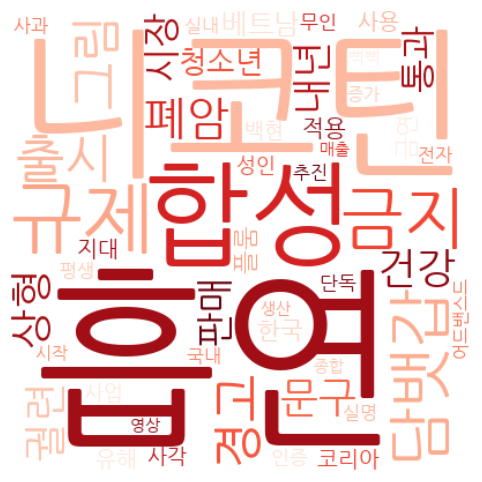

In [ ]:
# 특정 연도 데이터 필터링
year = 2024
filtered_data = data[data["year"] == year]  # year가 2022인 데이터만 선택

# 불용어 리스트 정의
stopwords = ["전자담배", "담배"]  # 예시 불용어

# 제목 열에서 명사 추출
titles = filtered_data["title"]  # title 열 선택
all_nouns = []  # 명사를 담을 리스트

for title in titles:
    nouns = okt.nouns(title)  # 제목에서 명사 추출
    # 불용어 제외
    filtered_nouns = [noun for noun in nouns if noun not in stopwords and len(noun) > 1]
    all_nouns.extend(filtered_nouns)  # 추출된 명사를 리스트에 추가

print("추출된 명사 수:", len(all_nouns))
print("추출된 명사:", all_nouns)

# 빈도 계산하기
from collections import Counter

# 명사 빈도 계산
noun_counts = Counter(all_nouns)
print(noun_counts)

# 가장 많이 등장한 단어 상위 50개
noun_counts50 = noun_counts.most_common(50)
print(noun_counts50)

# 워드 클라우드 생성
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(
    width=400,            # 워드 클라우드 이미지 가로 크기
    height=400,           # 워드 클라우드 이미지 세로 크기
    background_color='white',  # 배경색 (기본값: black)
    font_path="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    colormap='Reds',
    stopwords=stopwords   # WordCloud 내에서도 불용어 지정 가능
).generate_from_frequencies(dict(noun_counts50))

# 워드 클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()
